In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from string import ascii_letters
from collections import Counter

In [ ]:
#Functions
def basic(data):
    print('Number of observations:', len(data))
    print('Number of classes:', data['type'].nunique())
    print('The classes is:', sorted(data['type'].unique()))
    print('Number of features:', len(data.columns)-1)
    x = list(data.columns)
    x.remove('type')
    print('The features is:', x )
    print('Amount of NULL values in each feature: \n')
    print(data.isnull().sum().sort_values(ascending = False))
    
def stats(data):
    stats = {}
    features = list(data.columns)
    features.remove('type')
    s = ['Minimum', 'Maximum', 'Mean', 'Median', 'Standard deviation', 'Variance', 'Average', 'Non-zero']
    for i in features:
        l = []
        x = train[i]
        l.append(np.amin(x))
        l.append(np.amax(x))
        l.append(np.mean(x))
        l.append(np.median(x))
        l.append(np.std(x))
        l.append(np.var(x))
        l.append(np.average(x))
        l.append(np.count_nonzero(x))
        stats[i] = l
    return pd.DataFrame.from_dict(stats, orient= 'index', columns = s)

def displot_features(data):
    features = list(data.columns)
    features.remove('type')

    fig, axes = plt.subplots(3, 3, figsize=(15, 10)) #(y, x)
    x = 0
    y = 0

    for feature in range(len(features)):
        sns.kdeplot(ax=axes[y, x], data= data[features[feature]], color = "#49C2DE", fill = True)
        y += 1
        if y == 3:
            y = 0
            x += 1

def boxplot_features(data):
    features = list(data.columns)
    features.remove('type')

    fig, axes = plt.subplots(3, 3, figsize=(15, 20))
    x = 0
    y = 0

    for feature in range(len(features)):
        sns.boxplot(ax=axes[y, x], x= data[features[feature]], color = "#49C2DE")
        y += 1
        if y == 3:
            y = 0
            x += 1


def typebar(data):
    x = Counter(data['type'])
    sns.barplot(list(x.keys()), list(x.values()))
    
def corrmatrix(data):
    sns.set_theme(style="white")

    # Generate a large random dataset
    d = data

    # Compute the correlation matrix
    corr = d.corr()

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap = cmap, center=0, vmin=0, vmax=1, square=True, 
                linewidths=.5, cbar_kws={"shrink": .5}, annot=True) #annot = value in cells

In [ ]:
test=pd.read_csv("../data/df_test.csv")
train=pd.read_csv("../data/df_train.csv")
train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
1,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17,2
2,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00,2
3,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
4,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
144,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.00,0.00,1
145,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15,2
146,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
147,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1


### Basic

In [ ]:
basic(train)

Number of observations: 149
Number of classes: 6
The classes is: [1, 2, 3, 5, 6, 7]
Number of features: 9
The features is: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Amount of NULL values in each feature: 

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
type    0
dtype: int64


### Type barplot

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


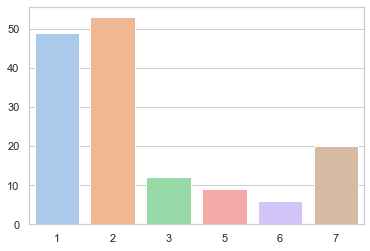

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
typebar(train);

### Correlation matrix between the different features

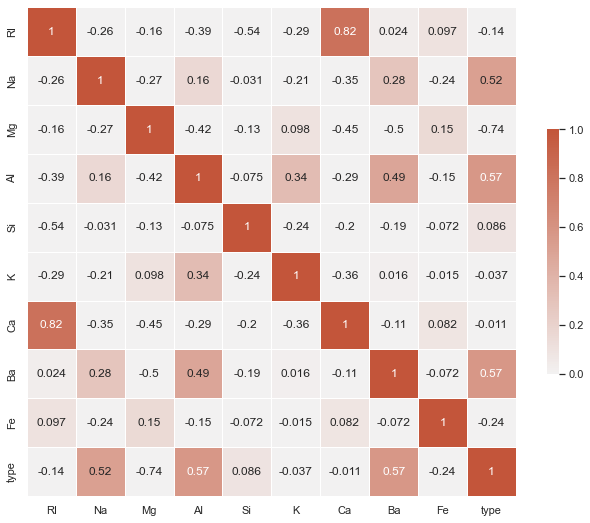

In [ ]:
corrmatrix(train)

### Distribution stats for each feature

In [ ]:
stats(train)

,Minimum,Maximum,Mean,Median,Standard deviation,Variance,Average,Non-zero
RI,1.51115,1.53393,1.518427,1.51769,0.003202,0.000010,1.518427,149
Na,10.73000,17.38000,13.420470,13.30000,0.860381,0.740255,13.420470,149
Mg,0.00000,3.98000,2.724765,3.49000,1.417412,2.009057,2.724765,121
Al,0.29000,3.50000,1.434698,1.36000,0.504767,0.254790,1.434698,149
Si,69.81000,75.41000,72.623758,72.78000,0.780512,0.609199,72.623758,149
K,0.00000,6.21000,0.485168,0.55000,0.568082,0.322718,0.485168,130
Ca,5.43000,16.19000,8.924295,8.59000,1.506112,2.268373,8.924295,149
Ba,0.00000,3.15000,0.199799,0.00000,0.551459,0.304107,0.199799,26
Fe,0.00000,0.37000,0.061611,0.00000,0.097313,0.009470,0.061611,52


### Distribution plot for each feature

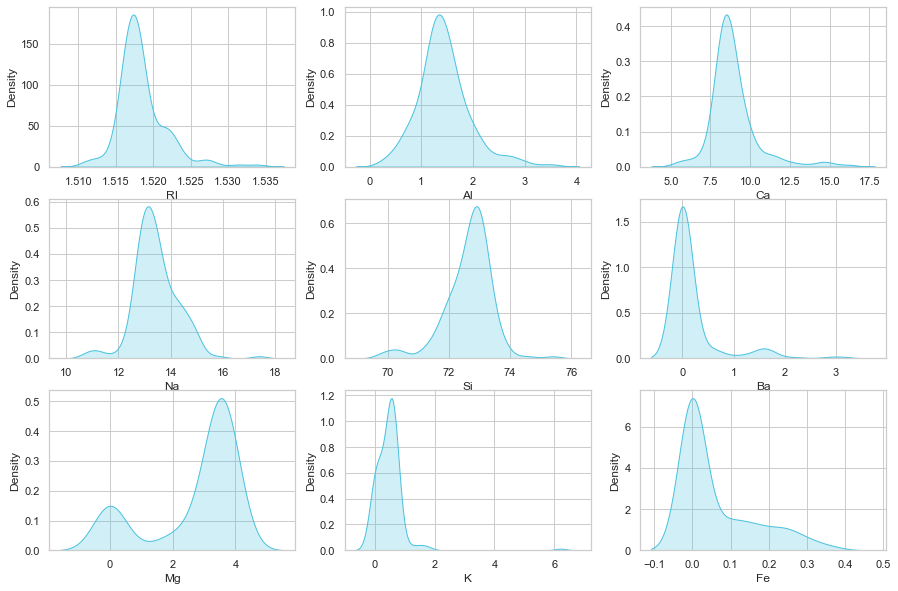

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
displot_features(train)

### Boxplot plot for each feature (Does this make sence?)

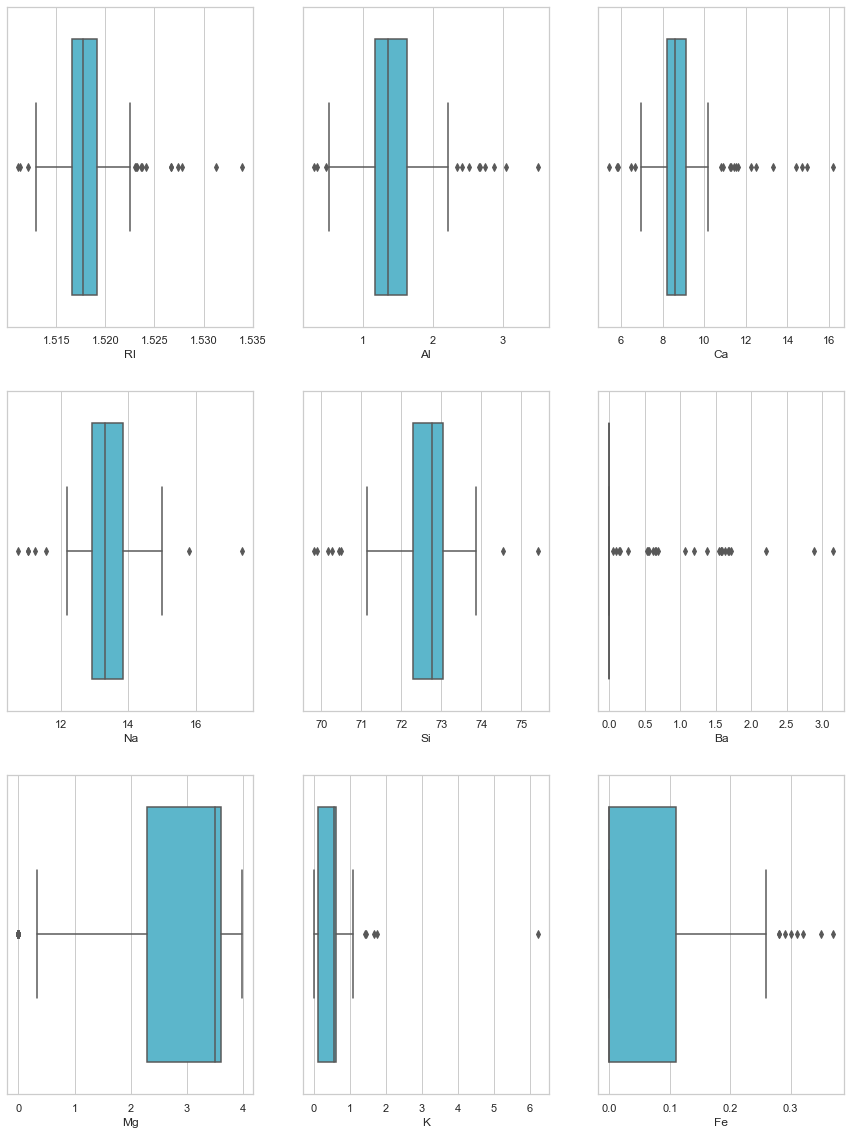

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
boxplot_features(train)

## Data cleaning
We start off by make the classes spand from 1 to 6, so class four is a thing, and class seven isn't.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


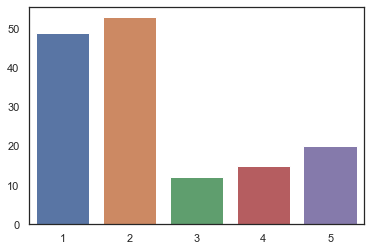

In [ ]:
train_copy
train_copy["type"].replace({5:4, 6:5 ,7:6}, inplace=True)
typebar(train_copy)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=58866f15-1cff-4fef-9525-5c3070562370' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>